<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Regression_Models_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Models Overview

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
X = df["Rebound Signal Strength nHz"]

In [4]:
y = df["Rock Density kg/m3"]

##Presentation Function

In [17]:
def show_model(regressor, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  regressor.fit(X_train.values.reshape(-1,1),y_train)
  y_preds = regressor.predict(np.arange(1,100).reshape(-1,1))
  print(mean_absolute_error(y_test,y_preds))
  print(np.sqrt(mean_squared_error(y_test,y_preds)))
  sns.scatterplot(data=df, x=X, y=y)
  plt.plot(np.arange(1,100),y_preds, c="r")

##Test Models

###Linear & Polynomial

In [11]:
from sklearn.pipeline import make_pipeline

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

0.3294158083498471
0.4090899608619404


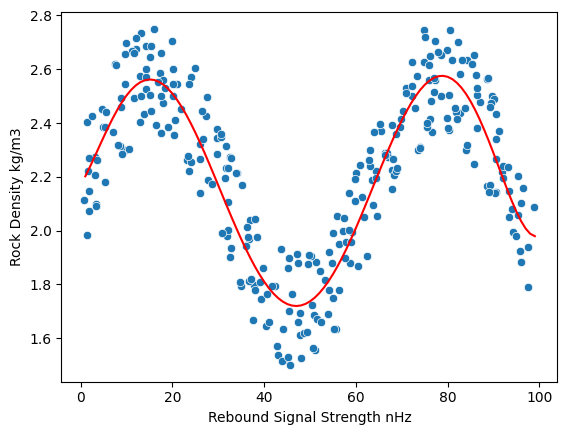

In [25]:
show_model(pipe, X, y)

###KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor

0.3434524162066137
0.4234966772765912


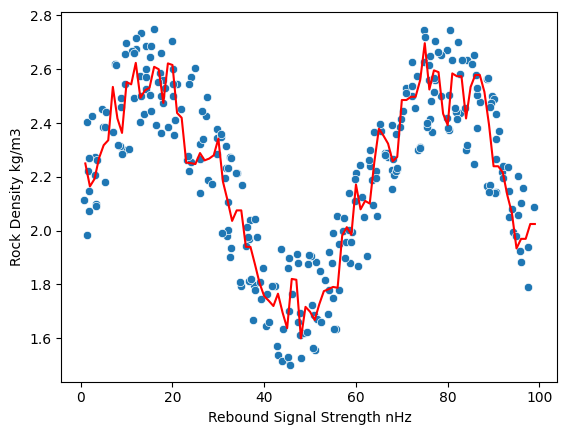

In [27]:
show_model(KNeighborsRegressor(n_neighbors=3), X, y) ##test n_neighbors [1,3,5,10]

###DecisionTreeRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

0.34696588275445467
0.4373417649024502


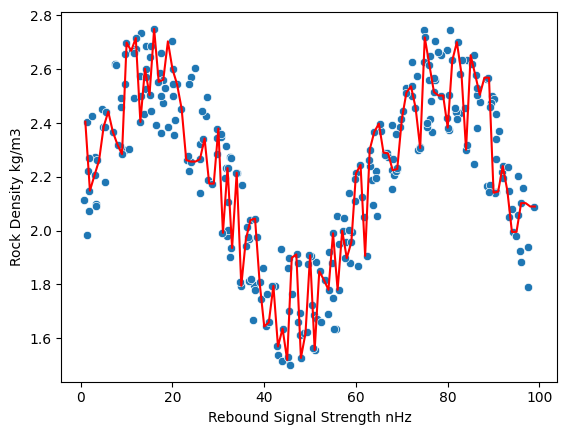

In [29]:
show_model(DecisionTreeRegressor(), X,y)

###SVR

In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [35]:
svr_model = SVR()

params = {"C":[0.01,0.1,1,5,10,100], "gamma":["auto","scale"]}

0.3254660020653506
0.40749788561878136


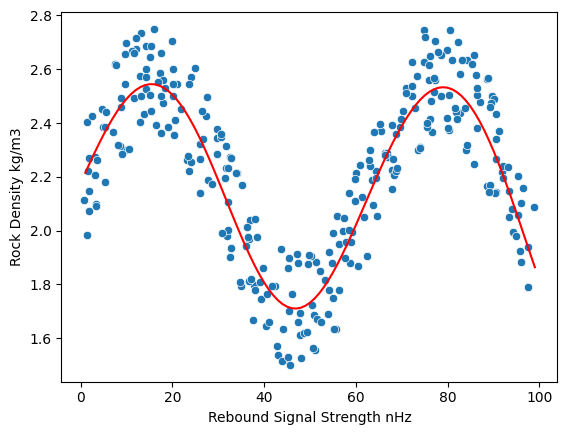

In [36]:
show_model(GridSearchCV(svr_model,params ), X,y)

###RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

0.3385054947066323
0.42814969838919553


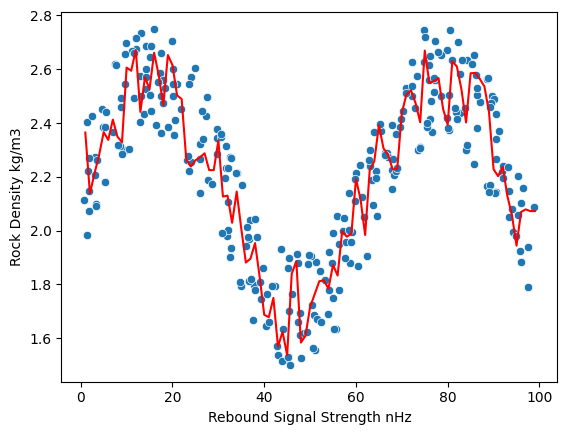

In [38]:
show_model(RandomForestRegressor(n_estimators=10), X,y)

###GradientBoostingRegressor, AdaBoostRegressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

0.33089976032860274
0.41372626298320436


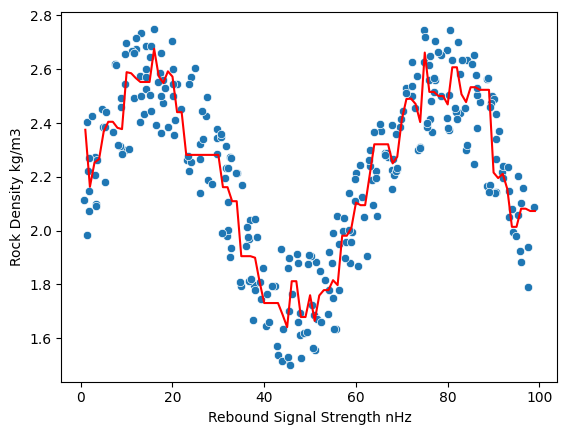

In [40]:
show_model(GradientBoostingRegressor(), X,y)

0.32987368919124704
0.40927568194122005


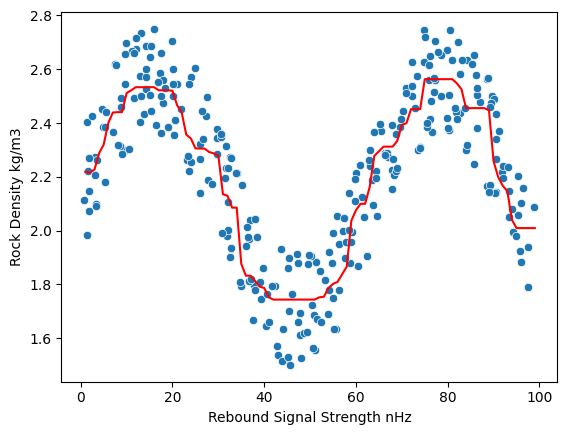

In [41]:
show_model(AdaBoostRegressor(), X,y)